Setup initial fastai stuff

In [19]:
import torch
from fastai.vision.all import *
from fastai.vision.widgets import *
print("Cuda is available: " + str(torch.cuda.is_available()))
import pathlib
plt = platform.system()
if plt == 'Linux': pathlib.WindowsPath = pathlib.PosixPath

Cuda is available: True


Path to our training data

In [2]:
path = Path('./data')

Label function - what label is this data

In [3]:
def is_albani(path):
  return parent_label(path) == "albani"

Create our dataloader

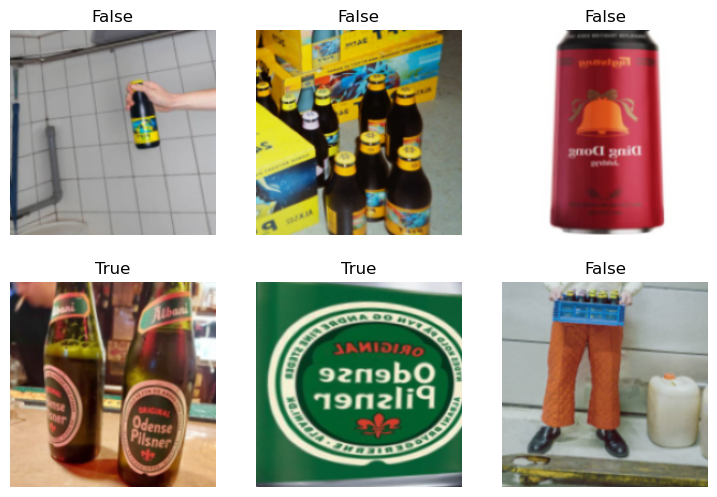

In [13]:
dls = DataBlock(
  blocks=(ImageBlock, CategoryBlock),
  get_items=get_image_files,
  splitter=RandomSplitter(valid_pct=0.2, seed=69420),
  get_y=is_albani,
  item_tfms=[Resize(192, method='squish')],
  batch_tfms=aug_transforms(min_scale=0.5, size=192)
).dataloaders(path, bs=16)

dls.show_batch(max_n=6)

Train ze model

In [23]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.940795,0.362740,0.138889,00:02


epoch,train_loss,valid_loss,error_rate,time
0,0.545976,0.221662,0.083333,00:02
1,0.388266,0.392433,0.111111,00:02
2,0.308797,0.210729,0.083333,00:02
3,0.192688,0.098898,0.041667,00:02


In [24]:
learn.export('resnet18-albani.pkl')

Optimize and clean data

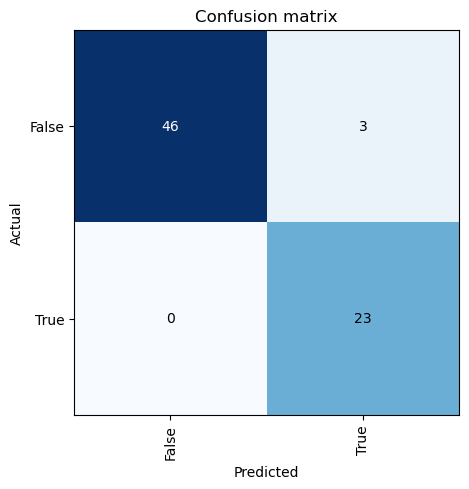

In [25]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

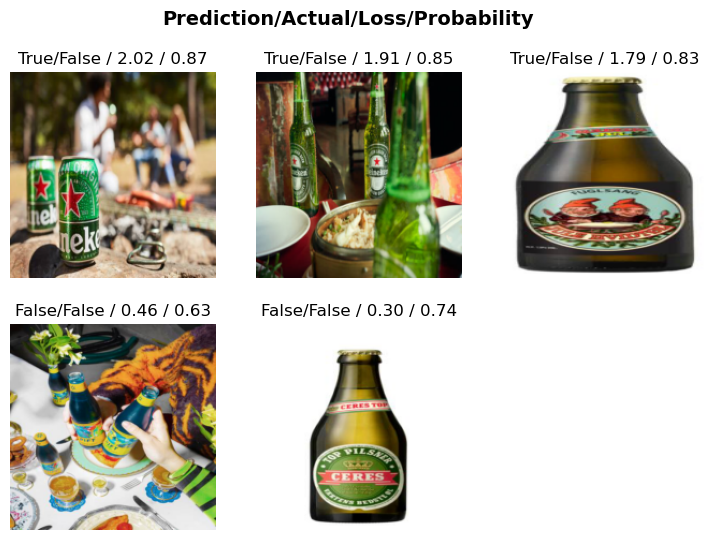

In [26]:
interp.plot_top_losses(5, nrows=2)

Launch fast ai data cleaner widget

In [20]:
cleaner = ImageClassifierCleaner(learn)
cleaner